In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymodels, pyaccel

from idanalysis.idsdata import IVU18Data
from idanalysis.analysis import StorageRingAnalysis
from idanalysis.analysis import KickmapAnalysis

In [2]:
ivudata = IVU18Data()
ivudata.subsecs

['ID08SB', 'ID14SB']

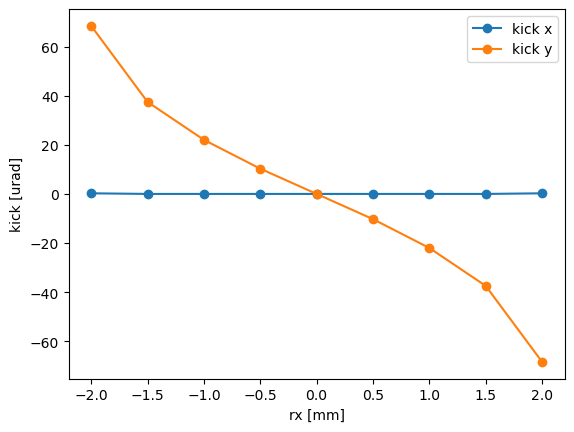

In [3]:
kmap_fname = ivudata.get_kickmap_filename(gap=4.3)
# kmap_fname = kmap_fname.split('/')[-3] + '/' + kmap_fname.split('/')[-2] + '/' + kmap_fname.split('/')[-1]
kmap_fname = kmap_fname.split('/')[-1]

kick_anl = KickmapAnalysis(kmap_fname)
rx0, ry0, pxf, pyf, rxf, ryf = kick_anl.get_kicks_at_plane(
    indep_var="y", plane=0)

plt.figure()
plt.plot(1e3*ry0, 108/5*1e6*pxf, '-o', label='kick x')
plt.plot(1e3*ry0, 108/5*1e6*pyf, '-o', label='kick y')
plt.xlabel('rx [mm]')
plt.ylabel('kick [urad]')
plt.legend()

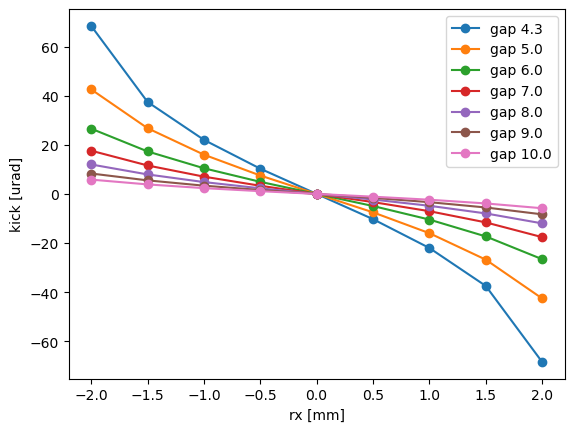

In [6]:
plt.figure()
gaps = np.array([4.3, 5, 6, 7, 8, 9, 10])
for gap in gaps:
    kmap_fname = ivudata.get_kickmap_filename(gap=gap)
    # kmap_fname = kmap_fname.split('/')[-3] + '/' + kmap_fname.split('/')[-2] + '/' + kmap_fname.split('/')[-1]
    kmap_fname = kmap_fname.split('/')[-1]

    kick_anl = KickmapAnalysis(kmap_fname)
    rx0, ry0, pxf, pyf, rxf, ryf = kick_anl.get_kicks_at_plane(
        indep_var="y", plane=0)

    plt.plot(1e3*ry0, 108/5*1e6*pyf, '-o', label='gap {:.1f}'.format(gap))
    plt.xlabel('rx [mm]')
    plt.ylabel('kick [urad]')
    plt.legend()

In [7]:
ring_anl = StorageRingAnalysis()
ring_anl.calc_type = ring_anl.CalcTypes.symmetrized

kmap_fname = ivudata.get_kickmap_filename(gap=4.3)
ring_anl.add_id_to_model(
    kmap_fname=kmap_fname, subsec=ivudata.subsecs[0],
    fam_name=ivudata.id_famname, rescale_kicks=108/5)
model = pymodels.si.create_accelerator()
ring_anl.set_model_ids(model)

: 